# Assignment 2
## Seytkaliev Makshe, BS19-SD02 m.seytkaliev@innopolis.university

## Importing libraries:

In [1]:
import pandas
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from skimage import io
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, \
    Conv2DTranspose, Concatenate, BatchNormalization, UpSampling2D
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Practical Tasks on Ensemble Learning


## 1. Reading data and splitting it into train and test sets:

### Reading Data:

In [2]:
data = pandas.read_csv("android_traffic.csv")
data

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,39,33,5100,4140,39,3,benign
1,117,0,9,23514,0,128,107,26248,24358,128,11,benign
2,196,0,6,24151,0,205,214,163887,24867,205,9,benign
3,6,0,1,889,0,7,6,819,975,7,1,benign
4,6,0,1,882,0,7,6,819,968,7,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,0,0,0,0,0,2,2,257,143,2,2,malicious
7841,4,4,1,296,0,5,1,86,382,5,1,malicious
7842,0,0,0,0,0,2,2,257,143,2,2,malicious
7843,0,0,0,0,0,2,2,257,143,2,2,malicious


### Preprocessing data:
Transforming categorical data to numerical:

In [3]:
column = data["type"]
numerical = []
for i in range(len(column)):
    if column[i] != "benign":
        numerical.append(1)
    else:
        numerical.append(0)
data["type"] = numerical
data


,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,39,33,5100,4140,39,3,0
1,117,0,9,23514,0,128,107,26248,24358,128,11,0
2,196,0,6,24151,0,205,214,163887,24867,205,9,0
3,6,0,1,889,0,7,6,819,975,7,1,0
4,6,0,1,882,0,7,6,819,968,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,0,0,0,0,0,2,2,257,143,2,2,1
7841,4,4,1,296,0,5,1,86,382,5,1,1
7842,0,0,0,0,0,2,2,257,143,2,2,1
7843,0,0,0,0,0,2,2,257,143,2,2,1


Imputing data:

In [4]:
imputer = SimpleImputer(strategy='mean')
data_info = []

for i in range(data.shape[1]):
    current = data[data.columns[i]]
    current = np.array(current)
    current = current.reshape(-1, 1)
    imputer.fit(current)
    current = imputer.transform(current)
    data_info.append(current)

data = data_info

Scaling data:

In [5]:
scaler = RobustScaler()
data = np.asarray(data)

for i in range(data.shape[0]):
    feature = np.asarray(data[i]).reshape(-1, 1)
    scaler.fit(feature)
    feature = scaler.transform(feature)
    data[i] = feature.reshape(-1, 1)

converted = [[] for i in range(len(data[0]))]
for i in range(len(data)):
    for j in range(len(data[i])):
        converted[j].append(data[i][j][0])

data = pandas.DataFrame(converted)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.126437,6.0,0.333333,0.035572,0.0,0.098901,0.105882,0.039905,0.029142,0.098901,0.00,0.0
1,1.057471,0.0,2.333333,1.770197,0.0,1.076923,0.976471,0.875464,1.777499,1.076923,2.00,0.0
2,1.965517,0.0,1.333333,1.826564,0.0,1.923077,2.235294,6.313591,1.821515,1.923077,1.50,0.0
3,-0.218391,0.0,-0.333333,-0.231838,0.0,-0.252747,-0.211765,-0.129237,-0.244552,-0.252747,-0.50,0.0
4,-0.218391,0.0,-0.333333,-0.232457,0.0,-0.252747,-0.211765,-0.129237,-0.245157,-0.252747,-0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,-0.287356,0.0,-0.666667,-0.310503,0.0,-0.307692,-0.258824,-0.151442,-0.316499,-0.307692,-0.25,1.0
7841,-0.241379,4.0,-0.333333,-0.284311,0.0,-0.274725,-0.270588,-0.158198,-0.295832,-0.274725,-0.50,1.0
7842,-0.287356,0.0,-0.666667,-0.310503,0.0,-0.307692,-0.258824,-0.151442,-0.316499,-0.307692,-0.25,1.0
7843,-0.287356,0.0,-0.666667,-0.310503,0.0,-0.307692,-0.258824,-0.151442,-0.316499,-0.307692,-0.25,1.0


Train-test splitting:

In [6]:
x = data.iloc[:, :(data.shape[1]-1)].values
y = data.iloc[:, ((data.shape[1])-1)].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### 2. Creating models:

RandomForestClassifier:

In [ ]:
forest = RandomForestClassifier(max_depth=15)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100.0}%")

Bagging classifier:


In [ ]:
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100.0}%")

Ada boost classifier:


In [ ]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100.0}%")

### 3. Tuning hyper-parameters:

Random forest classifier:

In [10]:
param_grid = {'n_estimators':[30, 40, 50, 60, 70]}
classifier = RandomForestClassifier(max_depth=15)

grid_search_clf = GridSearchCV(estimator=classifier.fit(x_train,y_train), param_grid=param_grid)
grid_search_clf.fit(x_train, y_train)

forest_y_pred = grid_search_clf.predict(x_test)
forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_parameters = grid_search_clf.best_params_

print(f"Accuracy: {forest_accuracy * 100.0}%")

Accuracy: 89.67495219885278%


Bagging classifier:

In [11]:
param_grid = {'n_estimators':[30, 40, 50, 60, 70],
              'base_estimator__max_features':["log2", "sqrt"],
              'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)}
classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
grid_search_clf = GridSearchCV(estimator=classifier.fit(x_train,y_train), param_grid=param_grid)
grid_search_clf.fit(x_train, y_train)

bag_y_pred = grid_search_clf.predict(x_test)
bag_accuracy = accuracy_score(y_test, bag_y_pred)
bag_parameters = grid_search_clf.best_params_

print(f"Accuracy: {bag_accuracy * 100.0}%")

Accuracy: 90.31230082855322%


Ada Boost Classifier:

In [12]:
param_grid = {'n_estimators':[30, 40, 50, 60, 70],
              'base_estimator__max_features':["log2", "sqrt"],
              'base_estimator__min_impurity_decrease': np.logspace(-6, -9, num=13)}

classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

grid_search_clf = GridSearchCV(estimator=classifier.fit(x_train,y_train), param_grid=param_grid)
grid_search_clf.fit(x_train, y_train)

ada_y_pred = grid_search_clf.predict(x_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)
ada_parameters = grid_search_clf.best_params_

print(f"Accuracy: {ada_accuracy * 100.0}%")

Accuracy: 88.2727852135118%


#### Final models:


Random Forest Classifier


In [13]:
model = RandomForestClassifier(max_depth=15, n_estimators=forest_parameters['n_estimators'])
model.fit(x_train, y_train)
final_forest_y_pred = model.predict(x_test)
final_forest_predictions = [round(value) for value in final_forest_y_pred]
final_forest_accuracy = accuracy_score(y_test, final_forest_predictions)

print(f"Accuracy: {final_forest_accuracy * 100.0}%")

Accuracy: 90.31230082855322%


Bagging Classifier

In [14]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        max_depth=15, max_features=bag_parameters['base_estimator__max_features'],
        min_impurity_decrease=bag_parameters['base_estimator__min_impurity_decrease']),
        n_estimators=bag_parameters['n_estimators'])
bag.fit(x_train, y_train)
final_bag_y_pred = bag.predict(x_test)
final_bag_predictions = [round(value) for value in final_bag_y_pred]
final_bag_accuracy = accuracy_score(y_test, final_bag_predictions)

print(f"Accuracy: {final_bag_accuracy * 100.0}%")

Accuracy: 89.8661567877629%


Ada Boost Classifier


In [15]:
classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(
        max_depth=15, max_features=ada_parameters['base_estimator__max_features'],
        min_impurity_decrease=ada_parameters['base_estimator__min_impurity_decrease']),
        n_estimators=ada_parameters['n_estimators'])
classifier.fit(x_train, y_train)
final_ada_y_pred = classifier.predict(x_test)
final_ada_predictions = [round(value) for value in final_ada_y_pred]
final_ada_accuracy = accuracy_score(y_test, final_ada_predictions)

print(f"Accuracy: {final_ada_accuracy * 100.0}%")


Accuracy: 89.73868706182282%


Since fundamental difference between Random Forest and Bagging classifier is that Random
Forest uses random subsets of features to train individual trees, whereas Bagging Classifier
uses all features for splitting a node, they perform almost the same with a small deviation
of 0.5 - 1%. AdaBoost classifier, however performs worse than Random Forest and Bagging
Classifier, since it works better with a lot of weak learners iteratively combining them
into accurate prediction algorithm.


## 4. Reasoning on max_depth:
The deeper the tree for Random Forest, the more it splits and the more information
about data it captures, meaning it will increase accuracy. Bagging Classifier, like Random
Forest, will also increase its accuracy. When tree becomes deeper, it increases
chances of getting a good prediction. AdaBoost on the other hand, will increase variance,
since there will be more weighting which will result in overfitting and poorer performance
in a test set.

## 5. Tuning max_depth:

In [16]:
forest_accuracies = []
bag_accuracies = []
ada_accuracies = []

for i in range(5, 26):

    model = RandomForestClassifier(max_depth=i, n_estimators=forest_parameters['n_estimators'])
    model.fit(x_train, y_train)
    y_pred_rfc_c = model.predict(x_test)
    predictions_rfc_c = [round(value) for value in y_pred_rfc_c]
    forest_accuracies.append(accuracy_score(y_test, predictions_rfc_c) * 100.0)

    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier
    (max_depth=i, max_features=bag_parameters['base_estimator__max_features'],
     min_impurity_decrease=bag_parameters['base_estimator__min_impurity_decrease']),
                            n_estimators=bag_parameters['n_estimators'])
    bag.fit(x_train, y_train)
    y_pred_bc_c = bag.predict(x_test)
    predictions_bc_c = [round(value) for value in y_pred_bc_c]
    bag_accuracies.append(accuracy_score(y_test, predictions_bc_c) * 100.0)

    classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier
    (max_depth=i, max_features=ada_parameters['base_estimator__max_features'],
     min_impurity_decrease=ada_parameters['base_estimator__min_impurity_decrease']),
                                    n_estimators=ada_parameters['n_estimators'])
    classifier.fit(x_train, y_train)
    y_pred_abc_c = classifier.predict(x_test)
    predictions_abc_c = [round(value) for value in y_pred_abc_c]
    ada_accuracies.append(accuracy_score(y_test, predictions_abc_c) * 100.0)




Initializing models with the best parameters and plotting graphs:

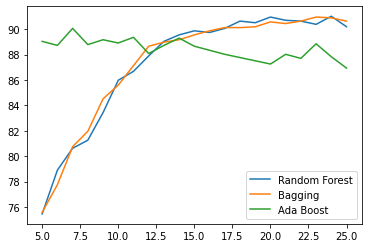

In [17]:
max_depth = [i for i in range(5, 26)]
plt.plot(max_depth, forest_accuracies, label='Random Forest')
plt.plot(max_depth, bag_accuracies, label='Bagging')
plt.plot(max_depth, ada_accuracies, label='Ada Boost')
plt.legend()
plt.show()

# Practical task on CNN


## 1. Preprocessing and visualising the dataset:
Reading images and converting them to gray:

In [34]:
image_names = [im for im in listdir('images/') if isfile(join('images/', im))]
image_names.sort()
images = {}
for name in image_names:
        image = io.imread(f"images/{name}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images[name] = image

['001_01.png', '001_02.png', '001_03.png', '001_04.png', '001_05.png', '001_06.png', '001_07.png', '001_08.png', '001_09.png', '001_10.png', '001_11.png', '001_12.png', '002_01.png', '002_02.png', '002_03.png', '002_04.png', '002_05.png', '002_06.png', '002_07.png', '002_08.png', '002_09.png', '002_10.png', '002_11.png', '002_12.png', '003_01.png', '003_02.png', '003_03.png', '003_04.png', '003_05.png', '003_06.png', '003_07.png', '003_08.png', '003_09.png', '003_10.png', '003_11.png', '003_12.png', '004_01.png', '004_02.png', '004_03.png', '004_04.png', '004_05.png', '004_06.png', '004_07.png', '004_08.png', '004_09.png', '004_10.png', '004_11.png', '004_12.png', '005_01.png', '005_02.png', '005_03.png', '005_04.png', '005_05.png', '005_06.png', '005_07.png', '005_08.png', '005_09.png', '005_10.png', '005_11.png', '005_12.png', '006_01.png', '006_02.png', '006_03.png', '006_04.png', '006_05.png', '006_06.png', '006_07.png', '006_08.png', '006_09.png', '006_10.png', '006_11.png', '006_

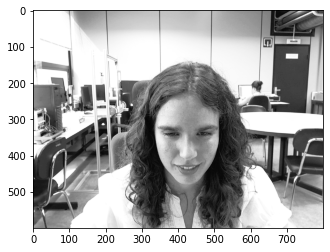

In [35]:
plt.imshow(images[image_names[0]], cmap="Greys_r")
print(image_names)

Reading annotations for images:

In [36]:
image_labels = []
with open("labels/image_labels.txt", 'r') as f:
    lines = f.readlines()

for label in lines:
    temp = list(map(float, label.split()[1::]))
    temp = list(map(round, temp))
    temp = list(map(int, temp))
    image_labels.append(temp)
labels = dict(zip(image_names, image_labels))
print(image_labels)


[[491, 338, 471, 338, 453, 342, 402, 342, 383, 340, 363, 338], [493, 333, 479, 333, 456, 340, 405, 340, 391, 334, 365, 336], [495, 334, 477, 333, 458, 339, 407, 340, 389, 333, 369, 335], [494, 334, 473, 332, 456, 339, 405, 340, 385, 334, 368, 336], [496, 333, 471, 332, 458, 338, 407, 339, 383, 333, 370, 334], [496, 336, 474, 335, 458, 339, 408, 341, 386, 337, 370, 336], [495, 336, 475, 336, 458, 341, 408, 342, 387, 338, 370, 337], [496, 337, 479, 337, 460, 342, 409, 342, 391, 338, 371, 338], [497, 337, 484, 338, 461, 342, 410, 343, 396, 339, 371, 338], [498, 340, 483, 341, 461, 344, 411, 343, 395, 342, 372, 341], [496, 344, 476, 344, 458, 346, 408, 348, 388, 346, 369, 344], [499, 344, 475, 343, 460, 346, 410, 347, 387, 345, 372, 343], [460, 274, 449, 274, 429, 279, 382, 280, 372, 276, 351, 277], [458, 273, 447, 273, 427, 278, 381, 280, 370, 276, 350, 276], [458, 273, 443, 274, 427, 279, 381, 280, 367, 277, 349, 277], [455, 274, 439, 275, 424, 280, 378, 281, 362, 277, 348, 278], [454, 2

Visualizing one image and drawing eye corners and iris centers on it:


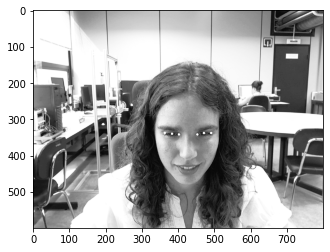

In [37]:
example_image = images[image_names[0]]
temp = example_image.copy()
example_label = labels[image_names[0]]

for i in range(0, 12, 2):
    x = int(float(example_label[i]))
    y = int(float(example_label[i + 1]))
    cv2.circle(temp, (int(x),int(y)), radius=3, color=(255, 255, 255), thickness=-1)
plt.imshow(temp, cmap="Greys_r")
plt.show()

Normalizing images:

In [38]:
temp1 = temp2 = 0
for image in images.values():
    temp1 = image
    image = image/255.0
    temp2 = image



[496, 333, 471, 332, 458, 338, 407, 339, 383, 333, 370, 334]


Cropping and resizing eye regions, creating 48x48 black image with white pixel at a iris center

In [39]:
X = []
Y = []
for im in image_names:
    for i in range(2):
        if i == 0:
            x1, y1, x2, y2, x3, y3 = labels[im][0:6]
        else:
            x1, y1, x2, y2, x3, y3 = labels[im][6:]

        width = x1 - x3
        hor_shift = int((48 - width)/2)
        cropped_x1 = x1 + hor_shift
        cropped_x2 = x3 - hor_shift

        height = abs(y1 - y3)
        vert_shift = int((48 - height)/2)
        cropped_y1 = min(y1, y3) - vert_shift
        cropped_y2 = max(y1, y3) + vert_shift

        if abs(cropped_y1 - cropped_y2) != 48:
            cropped_y1 -= 1
        if abs(cropped_x2 - cropped_x1) != 48:
            cropped_x2 -= 1

        eye = images[im][cropped_y1:cropped_y2, cropped_x2:cropped_x1]

        cropped_iris_x = int(x2 - cropped_x1)
        cropped_iris_y = int(y2 - cropped_y1)

        iris = np.zeros((48, 48, 1), np.uint8)
        iris[:] = 0
        iris[cropped_iris_y][cropped_iris_x] = 1

        X.append(eye)
        Y.append(iris)

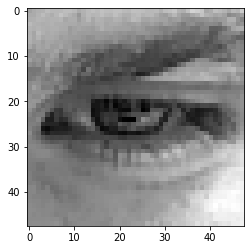

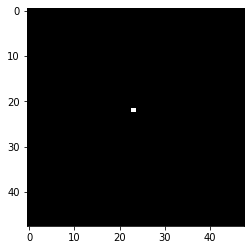

In [41]:
plt.imshow((tensorflow.squeeze(X[0])), cmap="Greys_r")
plt.show()
plt.imshow((tensorflow.squeeze(Y[0])), cmap="Greys_r")

Splitting dataset:



In [42]:
x = np.array(X)
y = np.array(Y)
x = x.reshape(2472, 48, 48, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


## 2. Building a CNN model using Keras



Epoch 1
62/62 [==============================] - 143s 2s/step - loss: 3837.0974 - conv2d_transpose_2_loss: 3837.0310 - conv2d_transpose_3_loss: 0.0656


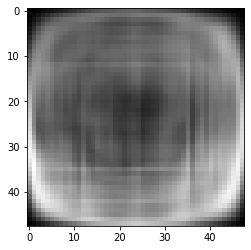

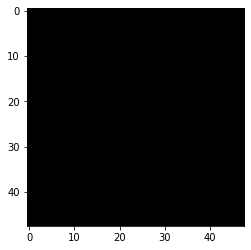


Epoch 2
62/62 [==============================] - 141s 2s/step - loss: 884.6310 - conv2d_transpose_2_loss: 884.6304 - conv2d_transpose_3_loss: 7.3672e-04


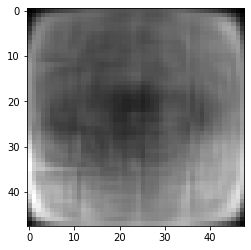

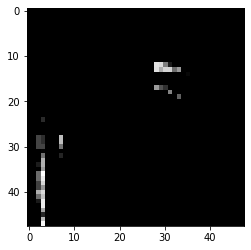


Epoch 3
62/62 [==============================] - 141s 2s/step - loss: 709.0523 - conv2d_transpose_2_loss: 709.0519 - conv2d_transpose_3_loss: 5.3624e-04


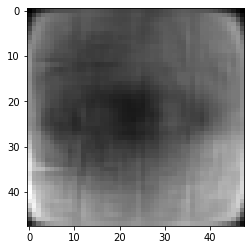

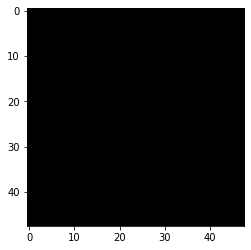


Epoch 4
62/62 [==============================] - 141s 2s/step - loss: 578.9919 - conv2d_transpose_2_loss: 578.9912 - conv2d_transpose_3_loss: 7.2938e-04


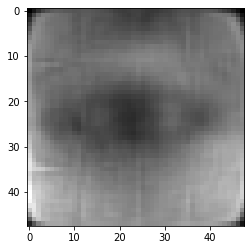

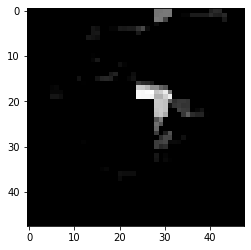


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 514.2964 - conv2d_transpose_2_loss: 514.2958 - conv2d_transpose_3_loss: 6.1678e-04


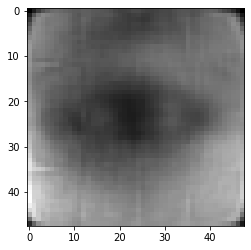

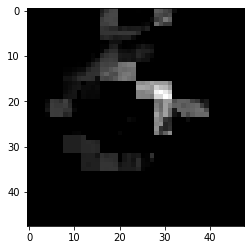


Epoch 6
62/62 [==============================] - 141s 2s/step - loss: 487.1351 - conv2d_transpose_2_loss: 487.1347 - conv2d_transpose_3_loss: 4.6516e-04


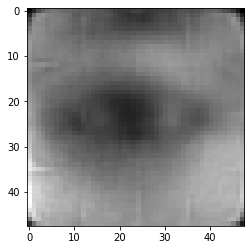

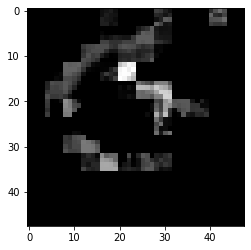


Epoch 7
62/62 [==============================] - 142s 2s/step - loss: 454.9289 - conv2d_transpose_2_loss: 454.9284 - conv2d_transpose_3_loss: 4.6564e-04


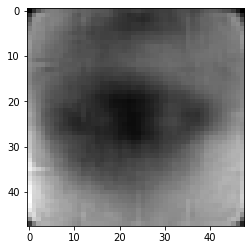

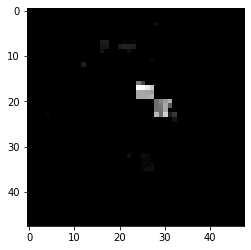


Epoch 8
62/62 [==============================] - 143s 2s/step - loss: 488.7757 - conv2d_transpose_2_loss: 488.7754 - conv2d_transpose_3_loss: 4.6660e-04


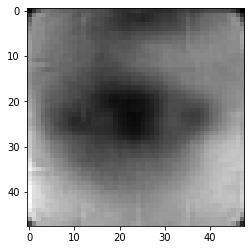

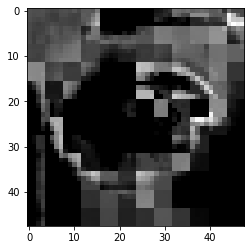


Epoch 9
62/62 [==============================] - 143s 2s/step - loss: 417.9724 - conv2d_transpose_2_loss: 417.9719 - conv2d_transpose_3_loss: 4.3693e-04


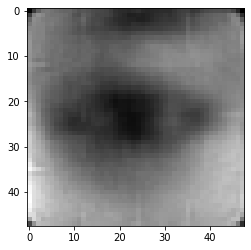

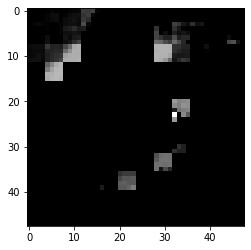


Epoch 10
62/62 [==============================] - 143s 2s/step - loss: 415.6057 - conv2d_transpose_2_loss: 415.6052 - conv2d_transpose_3_loss: 4.3936e-04


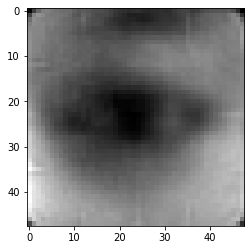

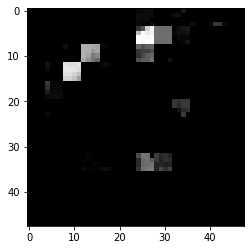


Epoch 11
62/62 [==============================] - 143s 2s/step - loss: 399.6768 - conv2d_transpose_2_loss: 399.6764 - conv2d_transpose_3_loss: 4.3832e-04


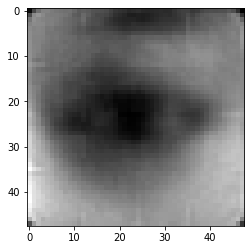

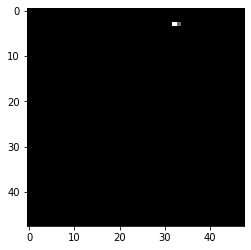


Epoch 12
62/62 [==============================] - 143s 2s/step - loss: 344.3769 - conv2d_transpose_2_loss: 344.3764 - conv2d_transpose_3_loss: 4.3541e-04


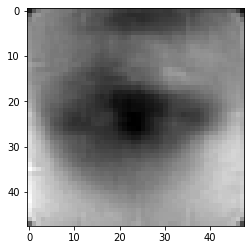

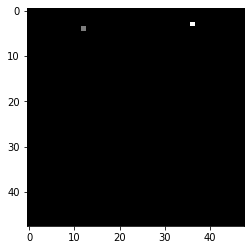


Epoch 13
62/62 [==============================] - 143s 2s/step - loss: 333.7775 - conv2d_transpose_2_loss: 333.7769 - conv2d_transpose_3_loss: 4.3541e-04


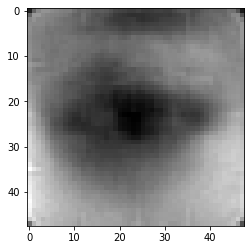

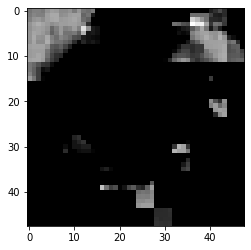


Epoch 14
62/62 [==============================] - 143s 2s/step - loss: 317.4111 - conv2d_transpose_2_loss: 317.4106 - conv2d_transpose_3_loss: 4.3702e-04


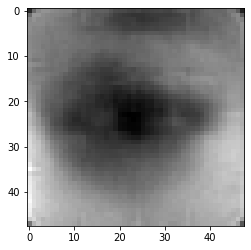

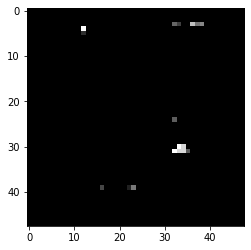


Epoch 15
62/62 [==============================] - 143s 2s/step - loss: 276.4143 - conv2d_transpose_2_loss: 276.4139 - conv2d_transpose_3_loss: 4.3506e-04


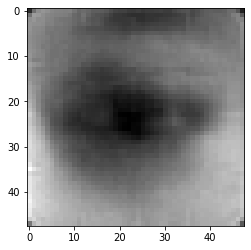

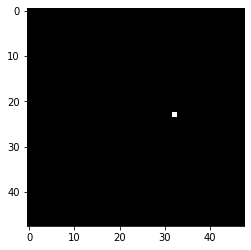

(None, 48, 48, 1)
[(None, 48, 48, 1), (None, 48, 48, 1)]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 64)   128         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 48, 48, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None

In [43]:
mse_model = []
accuracy_model = []

inlayer = Input(shape=(48,48,1))
x = Conv2D(64, (1, 1), activation='relu')(inlayer)
x = BatchNormalization()(x)

layer1 = MaxPooling2D((2, 2))(x)
layer1 = Conv2D(128, (1, 1), activation='relu')(layer1)
layer1 = BatchNormalization()(layer1)
layer1 = MaxPooling2D((2, 2))(layer1)
layer1 = Conv2D(256, (1, 1), activation='relu')(layer1)
layer1 = BatchNormalization()(layer1)

aux = Conv2D(128, (1, 1), activation='relu')(layer1)
aux = Conv2DTranspose(64, (13, 13), activation='relu')(aux)
aux = Conv2DTranspose(32, (13, 13), activation='relu')(aux)
aux = Conv2DTranspose(1, (13, 13), activation='relu')(aux)

layer2 = UpSampling2D(size=(4, 4))(layer1)
layer2 = Conv2D(64, (1, 1), activation='relu')(layer2)
layer2 = BatchNormalization()(layer2)

x = Concatenate()([layer2, x])
x = Conv2D(64, (1, 1), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(1, (1, 1), activation='relu')(x)

model = Model(inputs = inlayer, outputs = [aux, x])
model.compile(loss='mse', optimizer='adam')

tensorflow.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

for i in range (15):
    print("\nEpoch {}".format(i + 1))
    model.fit(x_train, [x_train, y_train], epochs=1)
    pred1_model, pred2_model = model.predict(x_test)
    plt.imshow((tensorflow.squeeze(pred1_model[0])), cmap='gray')
    plt.show()
    plt.imshow((tensorflow.squeeze(pred2_model[0])), cmap='gray')
    plt.show()
    mse_model.append(metrics.mean_squared_error(y_test.flatten(), pred1_model.flatten()))

print(model.input_shape)
print(model.output_shape)
print(model.summary())




## 3. Training CNN with different optimizers



In [49]:
def compile_model( activation, optimizer, loss_function):
    mse = []
    accuracy = []

    inlayer = Input(shape=(48,48,1))
    x = Conv2D(64, (1, 1), activation=activation)(inlayer)
    x = BatchNormalization()(x)

    layer1 = MaxPooling2D((2, 2))(x)
    layer1 = Conv2D(128, (1, 1), activation=activation)(layer1)
    layer1 = BatchNormalization()(layer1)
    layer1 = MaxPooling2D((2, 2))(layer1)
    layer1 = Conv2D(256, (1, 1), activation=activation)(layer1)
    layer1 = BatchNormalization()(layer1)

    aux = Conv2D(128, (1, 1), activation=activation)(layer1)
    aux = Conv2DTranspose(64, (13, 13), activation=activation)(aux)
    aux = Conv2DTranspose(32, (13, 13), activation=activation)(aux)
    aux = Conv2DTranspose(1, (13, 13),  activation=activation)(aux)

    layer2 = UpSampling2D(size=(4, 4))(layer1)
    layer2 = Conv2D(64, (1, 1), activation=activation)(layer2)
    layer2 = BatchNormalization()(layer2)

    x = Concatenate()([layer2, x])
    x = Conv2D(64, (1, 1), activation=activation)(x)
    x = BatchNormalization()(x)
    x = Conv2DTranspose(1, (1, 1), activation=activation)(x)

    model = Model(inputs = inlayer, outputs = [aux, x])
    model.compile(loss=loss_function, optimizer=optimizer)

    tensorflow.keras.utils.plot_model(
        model, to_file='model.png', show_shapes=True, show_dtype=False,
        show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
        layer_range=None
    )

    pred1_model = pred2_model = 0

    for i in range (5):
        print("\nEpoch {}".format(i + 1))
        model.fit(x_train, [x_train, y_train], epochs=1)
        pred1_model, pred2_model = model.predict(x_test)
        plt.imshow((tensorflow.squeeze(pred1_model[0])), cmap='gray')
        plt.show()
        plt.imshow((tensorflow.squeeze(pred2_model[0])), cmap='gray')
        plt.show()
        mse_model.append(metrics.mean_squared_error(x_test.flatten(), pred1_model.flatten()))

    return mse, pred1_model, pred2_model


Activation - sigmoid, optimizer - adam, loss - mse

Epoch 1
62/62 [==============================] - 145s 2s/step - loss: 10831.2129 - conv2d_transpose_6_loss: 10831.0361 - conv2d_transpose_7_loss: 0.1788


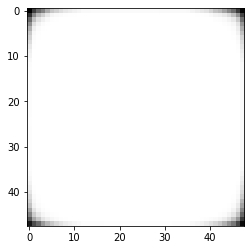

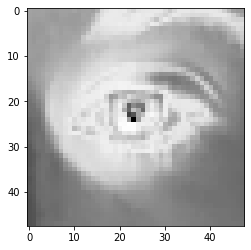


Epoch 2
62/62 [==============================] - 144s 2s/step - loss: 10825.9189 - conv2d_transpose_6_loss: 10825.8662 - conv2d_transpose_7_loss: 0.0538


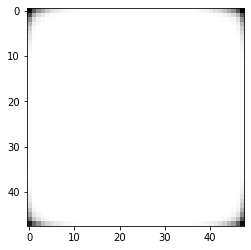

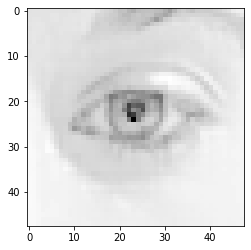


Epoch 3
62/62 [==============================] - 143s 2s/step - loss: 10825.4336 - conv2d_transpose_6_loss: 10825.4189 - conv2d_transpose_7_loss: 0.0161


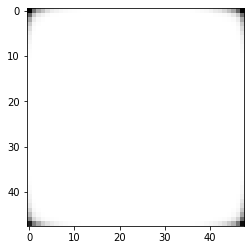

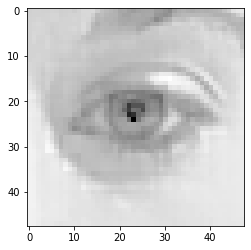


Epoch 4
62/62 [==============================] - 144s 2s/step - loss: 10825.2061 - conv2d_transpose_6_loss: 10825.2002 - conv2d_transpose_7_loss: 0.0072


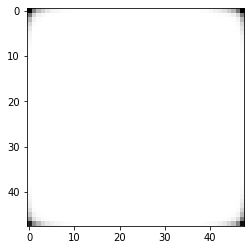

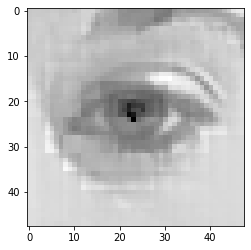


Epoch 5
62/62 [==============================] - 145s 2s/step - loss: 10825.0791 - conv2d_transpose_6_loss: 10825.0732 - conv2d_transpose_7_loss: 0.0042


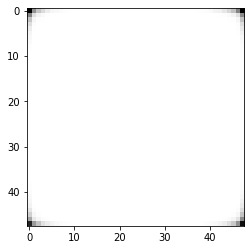

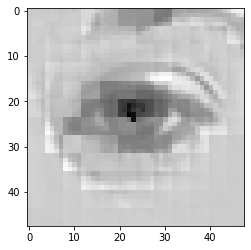


Epoch 6
62/62 [==============================] - 145s 2s/step - loss: 10824.9961 - conv2d_transpose_6_loss: 10824.9941 - conv2d_transpose_7_loss: 0.0028


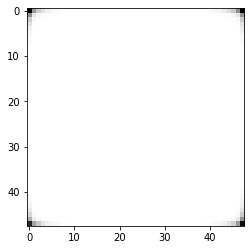

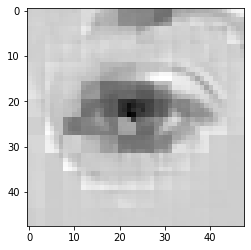


Epoch 7
62/62 [==============================] - 145s 2s/step - loss: 10824.9414 - conv2d_transpose_6_loss: 10824.9414 - conv2d_transpose_7_loss: 0.0021


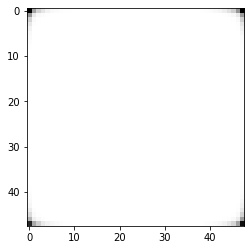

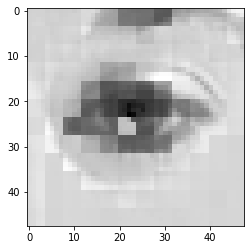


Epoch 8
62/62 [==============================] - 143s 2s/step - loss: 10824.9033 - conv2d_transpose_6_loss: 10824.9014 - conv2d_transpose_7_loss: 0.0016


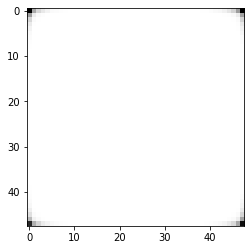

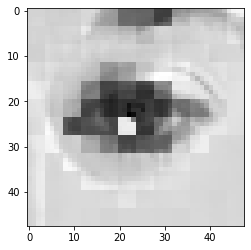


Epoch 9
62/62 [==============================] - 143s 2s/step - loss: 10824.8721 - conv2d_transpose_6_loss: 10824.8711 - conv2d_transpose_7_loss: 0.0014


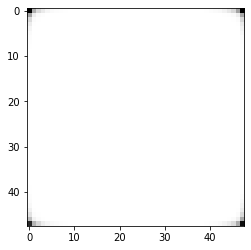

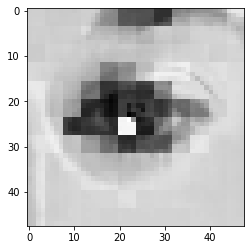


Epoch 10
62/62 [==============================] - 143s 2s/step - loss: 10824.8477 - conv2d_transpose_6_loss: 10824.8477 - conv2d_transpose_7_loss: 0.0012


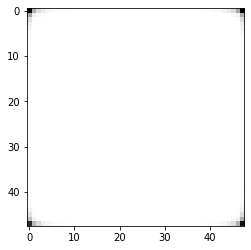

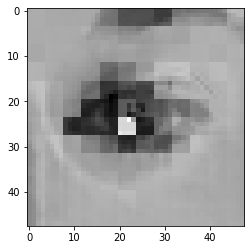


Epoch 11
62/62 [==============================] - 143s 2s/step - loss: 10824.8262 - conv2d_transpose_6_loss: 10824.8262 - conv2d_transpose_7_loss: 0.0010


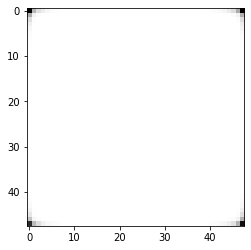

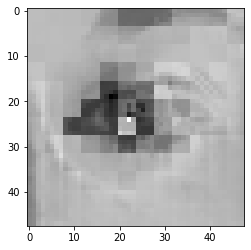


Epoch 12
62/62 [==============================] - 144s 2s/step - loss: 10824.8145 - conv2d_transpose_6_loss: 10824.8135 - conv2d_transpose_7_loss: 9.2604e-04


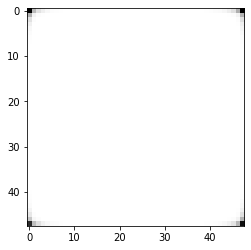

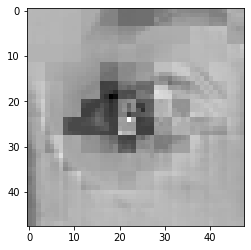


Epoch 13
62/62 [==============================] - 143s 2s/step - loss: 10824.7998 - conv2d_transpose_6_loss: 10824.7998 - conv2d_transpose_7_loss: 8.4771e-04


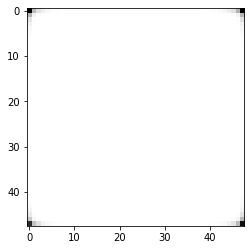

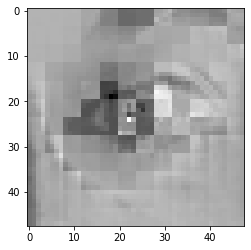


Epoch 14
62/62 [==============================] - 144s 2s/step - loss: 10824.7930 - conv2d_transpose_6_loss: 10824.7920 - conv2d_transpose_7_loss: 7.8626e-04


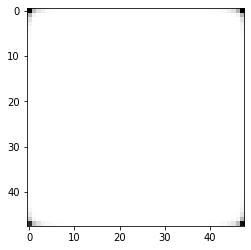

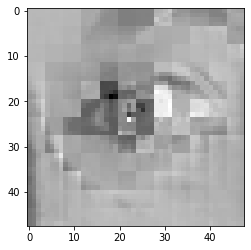


Epoch 15
62/62 [==============================] - 143s 2s/step - loss: 10824.7842 - conv2d_transpose_6_loss: 10824.7822 - conv2d_transpose_7_loss: 7.3749e-04


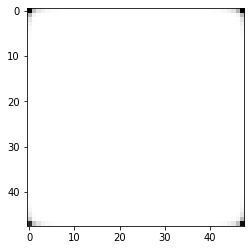

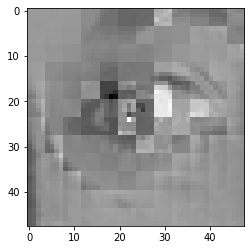

In [45]:
print('\nActivation - sigmoid, optimizer - adam, loss - mse')
mse_sigmoidAdamMse, pred1_sigmoidAdamMse, pred2_sigmoidAdamMse = compile_model('sigmoid', 'adam', 'mse')


Activation - sigmoid, optimizer - adam, loss - mae

Epoch 1
62/62 [==============================] - 145s 2s/step - loss: 93.2645 - conv2d_transpose_10_loss: 93.0712 - conv2d_transpose_11_loss: 0.1934


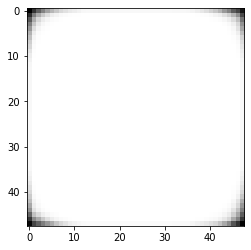

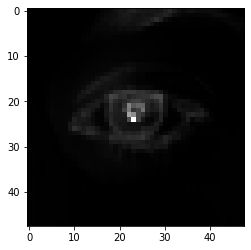


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 93.1495 - conv2d_transpose_10_loss: 93.0458 - conv2d_transpose_11_loss: 0.1037


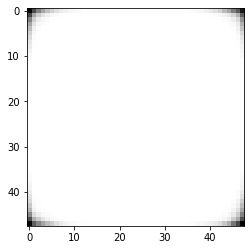

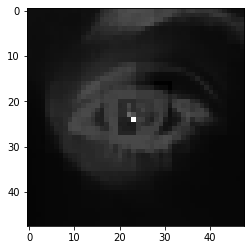


Epoch 3
62/62 [==============================] - 143s 2s/step - loss: 93.1155 - conv2d_transpose_10_loss: 93.0436 - conv2d_transpose_11_loss: 0.0719


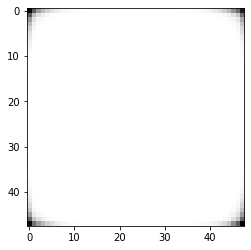

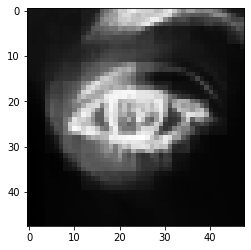


Epoch 4
62/62 [==============================] - 143s 2s/step - loss: 93.0919 - conv2d_transpose_10_loss: 93.0425 - conv2d_transpose_11_loss: 0.0494


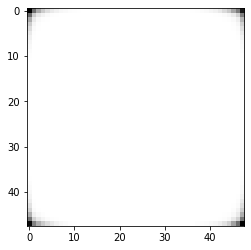

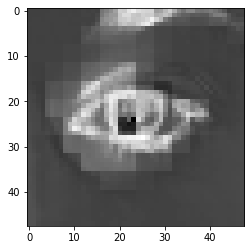


Epoch 5
62/62 [==============================] - 143s 2s/step - loss: 93.0822 - conv2d_transpose_10_loss: 93.0418 - conv2d_transpose_11_loss: 0.0404


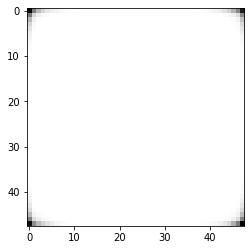

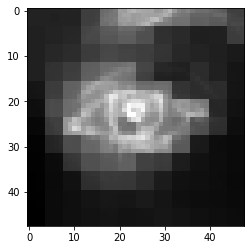


Epoch 6
62/62 [==============================] - 142s 2s/step - loss: 93.0714 - conv2d_transpose_10_loss: 93.0414 - conv2d_transpose_11_loss: 0.0300


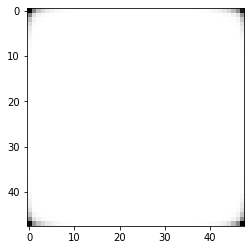

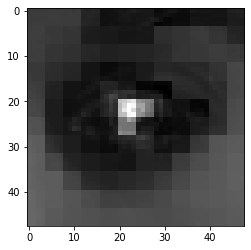


Epoch 7
62/62 [==============================] - 143s 2s/step - loss: 93.0557 - conv2d_transpose_10_loss: 93.0411 - conv2d_transpose_11_loss: 0.0146


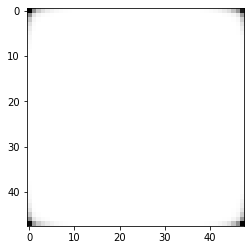

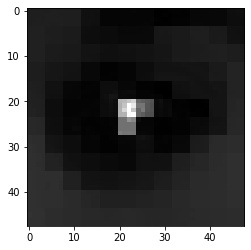


Epoch 8
62/62 [==============================] - 143s 2s/step - loss: 93.0484 - conv2d_transpose_10_loss: 93.0409 - conv2d_transpose_11_loss: 0.0075


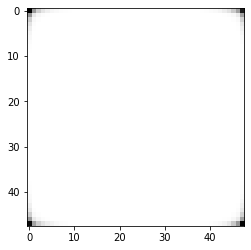

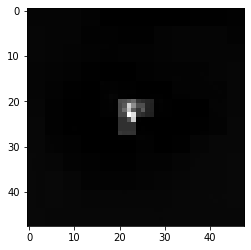


Epoch 9
62/62 [==============================] - 143s 2s/step - loss: 93.0448 - conv2d_transpose_10_loss: 93.0407 - conv2d_transpose_11_loss: 0.0040


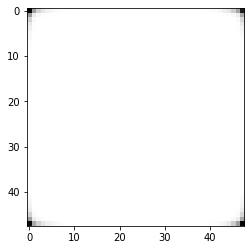

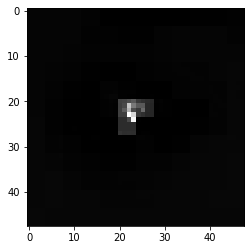


Epoch 10
62/62 [==============================] - 142s 2s/step - loss: 93.0433 - conv2d_transpose_10_loss: 93.0406 - conv2d_transpose_11_loss: 0.0027


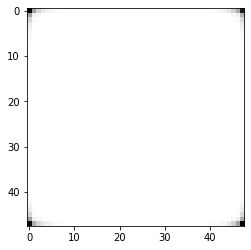

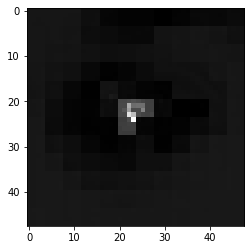


Epoch 11
62/62 [==============================] - 142s 2s/step - loss: 93.0421 - conv2d_transpose_10_loss: 93.0405 - conv2d_transpose_11_loss: 0.0016


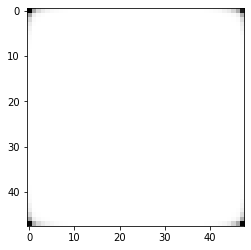

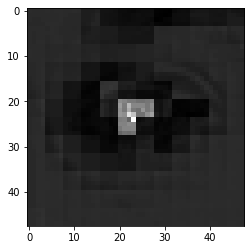


Epoch 12
62/62 [==============================] - 142s 2s/step - loss: 93.0417 - conv2d_transpose_10_loss: 93.0404 - conv2d_transpose_11_loss: 0.0013


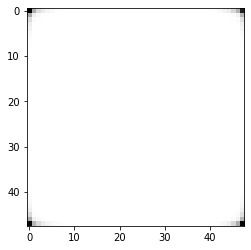

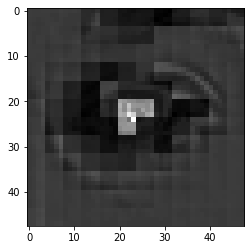


Epoch 13
62/62 [==============================] - 143s 2s/step - loss: 93.0415 - conv2d_transpose_10_loss: 93.0404 - conv2d_transpose_11_loss: 0.0011


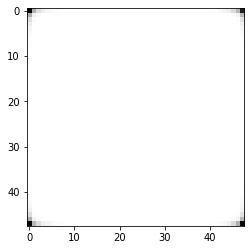

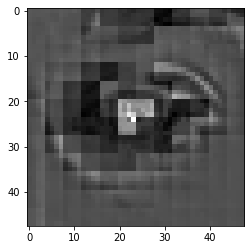


Epoch 14
62/62 [==============================] - 142s 2s/step - loss: 93.0413 - conv2d_transpose_10_loss: 93.0403 - conv2d_transpose_11_loss: 9.8504e-04


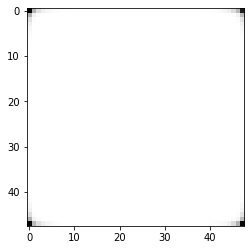

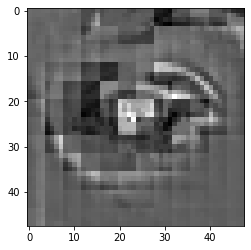


Epoch 15
62/62 [==============================] - 142s 2s/step - loss: 93.0412 - conv2d_transpose_10_loss: 93.0403 - conv2d_transpose_11_loss: 9.0102e-04


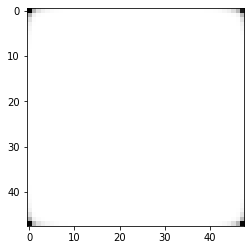

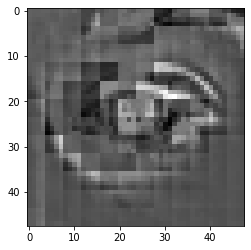

In [46]:
print('\nActivation - sigmoid, optimizer - adam, loss - mae')
mse_sigmoidAdamMae, pred1_sigmoidAdamMae, pred2_sigmoidAdamMae = compile_model('sigmoid', 'adam', 'mae')


Activation - sigmoid, optimizer - adamax, loss - mse

Epoch 1
62/62 [==============================] - 143s 2s/step - loss: 10835.2090 - conv2d_transpose_22_loss: 10835.0430 - conv2d_transpose_23_loss: 0.1665


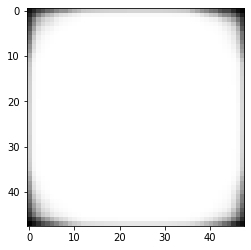

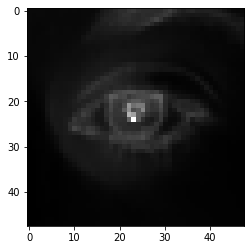


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 10828.6318 - conv2d_transpose_22_loss: 10828.5498 - conv2d_transpose_23_loss: 0.0805


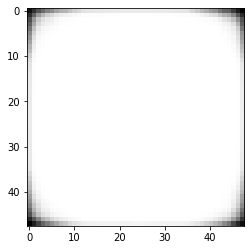

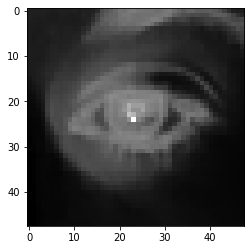


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 10827.5186 - conv2d_transpose_22_loss: 10827.4551 - conv2d_transpose_23_loss: 0.0634


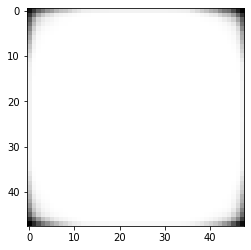

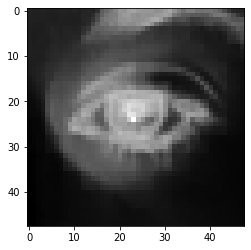


Epoch 4
62/62 [==============================] - 142s 2s/step - loss: 10826.9316 - conv2d_transpose_22_loss: 10826.8789 - conv2d_transpose_23_loss: 0.0540


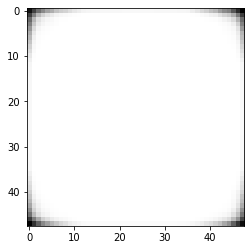

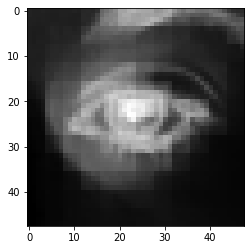


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 10826.5566 - conv2d_transpose_22_loss: 10826.5068 - conv2d_transpose_23_loss: 0.0474


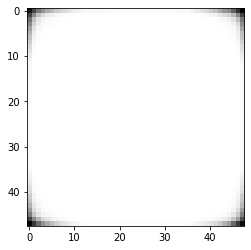

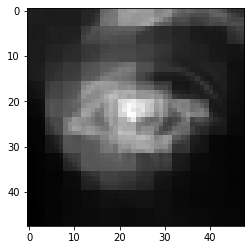

In [50]:
print('\nActivation - sigmoid, optimizer - adamax, loss - mse')
mse_sigmoidAdamaxMse, pred1_sigmoidAdamaxMse, pred2_sigmoidAdamaxMse = compile_model('sigmoid', 'adamax', 'mse')


Activation - sigmoid, optimizer - adamax, loss - mae

Epoch 1
62/62 [==============================] - 143s 2s/step - loss: 93.3434 - conv2d_transpose_26_loss: 93.0885 - conv2d_transpose_27_loss: 0.2550


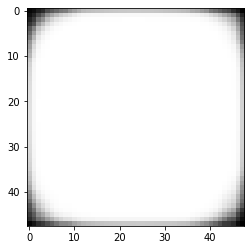

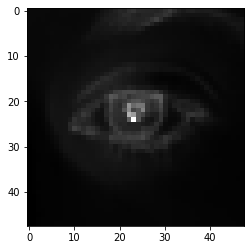


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 93.1898 - conv2d_transpose_26_loss: 93.0592 - conv2d_transpose_27_loss: 0.1307


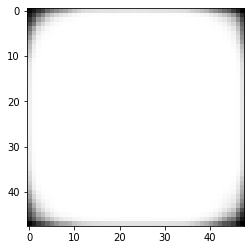

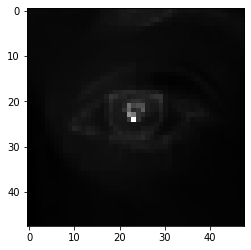


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 93.1648 - conv2d_transpose_26_loss: 93.0538 - conv2d_transpose_27_loss: 0.1110


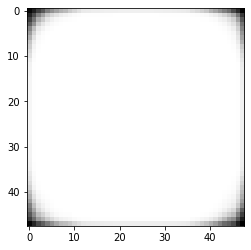

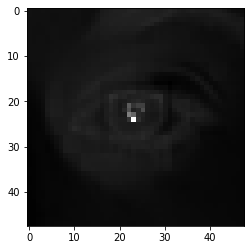


Epoch 4
62/62 [==============================] - 142s 2s/step - loss: 93.1427 - conv2d_transpose_26_loss: 93.0509 - conv2d_transpose_27_loss: 0.0918


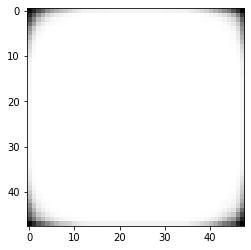

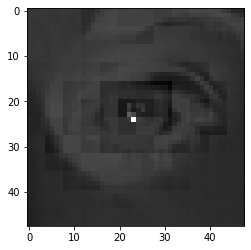


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 93.1278 - conv2d_transpose_26_loss: 93.0491 - conv2d_transpose_27_loss: 0.0787


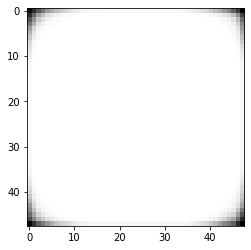

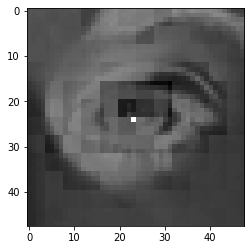

In [51]:
print('\nActivation - sigmoid, optimizer - adamax, loss - mae')
mse_sigmoidAdamaxMae, pred1_sigmoidAdamaxMae, pred2_sigmoidAdamaxMae = compile_model('sigmoid', 'adamax', 'mae')


Activation - sigmoid, optimizer - rmsprop, loss - mse

Epoch 1
62/62 [==============================] - 144s 2s/step - loss: 10829.6055 - conv2d_transpose_30_loss: 10829.4619 - conv2d_transpose_31_loss: 0.1447


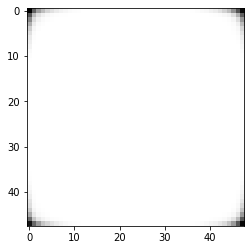

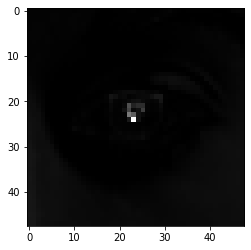


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 10825.1045 - conv2d_transpose_30_loss: 10825.0420 - conv2d_transpose_31_loss: 0.0630


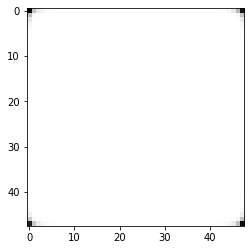

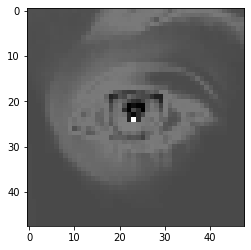


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 10824.7822 - conv2d_transpose_30_loss: 10824.7549 - conv2d_transpose_31_loss: 0.0288


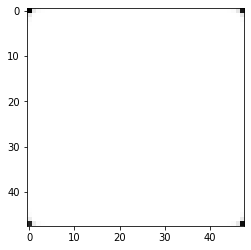

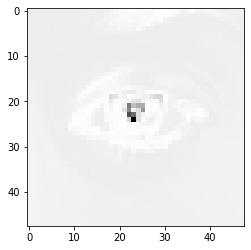


Epoch 4
62/62 [==============================] - 142s 2s/step - loss: 10824.7217 - conv2d_transpose_30_loss: 10824.7148 - conv2d_transpose_31_loss: 0.0060


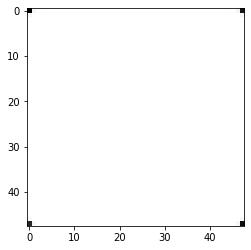

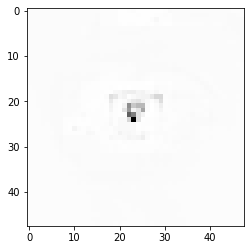


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 10824.7119 - conv2d_transpose_30_loss: 10824.7109 - conv2d_transpose_31_loss: 8.8345e-04


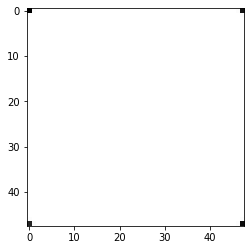

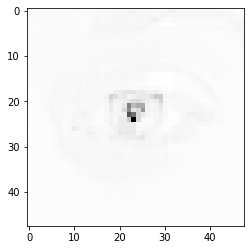

In [52]:
print('\nActivation - sigmoid, optimizer - rmsprop, loss - mse')
mse_sigmoidRmspropMse, pred1_sigmoidRmspropMse, pred2_sigmoidRmspropMse = compile_model('sigmoid', 'rmsprop', 'mse')


Activation - sigmoid, optimizer - rmsprop, loss - mae

Epoch 1
62/62 [==============================] - 144s 2s/step - loss: 93.2931 - conv2d_transpose_34_loss: 93.0654 - conv2d_transpose_35_loss: 0.2277


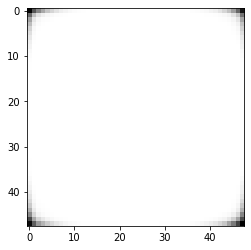

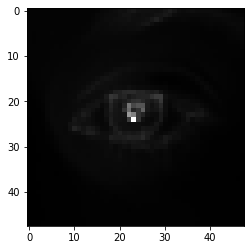


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 93.1578 - conv2d_transpose_34_loss: 93.0414 - conv2d_transpose_35_loss: 0.1163


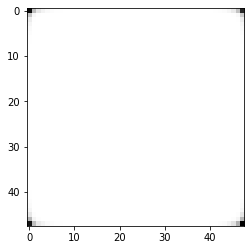

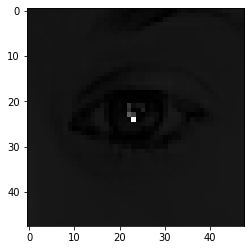


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 93.1183 - conv2d_transpose_34_loss: 93.0401 - conv2d_transpose_35_loss: 0.0782


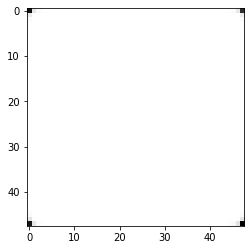

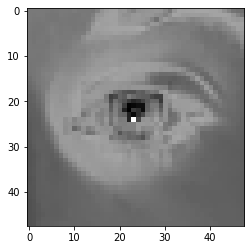


Epoch 4
62/62 [==============================] - 143s 2s/step - loss: 93.0849 - conv2d_transpose_34_loss: 93.0399 - conv2d_transpose_35_loss: 0.0450


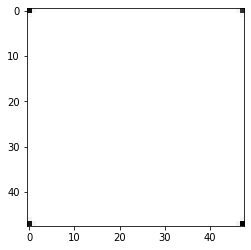

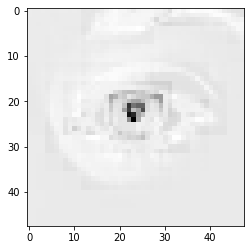


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 93.0629 - conv2d_transpose_34_loss: 93.0399 - conv2d_transpose_35_loss: 0.0230


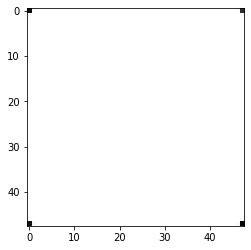

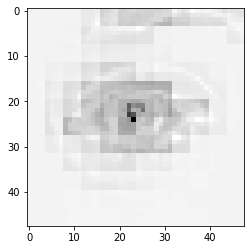

In [53]:
print('\nActivation - sigmoid, optimizer - rmsprop, loss - mae')
mse_sigmoidRmspropMae, pred1_sigmoidRmspropMae, pred2_sigmoidRmspropMae = compile_model('sigmoid', 'rmsprop', 'mae')


Activation - relu, optimizer - adam, loss - mse

Epoch 1
62/62 [==============================] - 143s 2s/step - loss: 2675.6809 - conv2d_transpose_38_loss: 2675.6426 - conv2d_transpose_39_loss: 0.0386


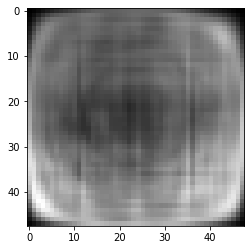

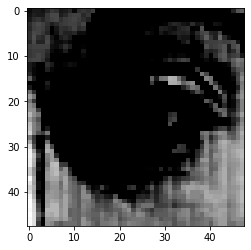


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 837.2416 - conv2d_transpose_38_loss: 837.2407 - conv2d_transpose_39_loss: 6.1281e-04


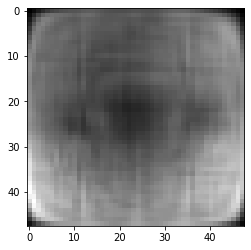

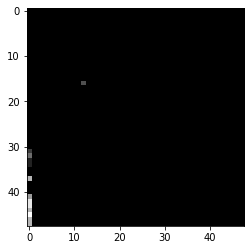


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 627.3941 - conv2d_transpose_38_loss: 627.3936 - conv2d_transpose_39_loss: 5.0432e-04


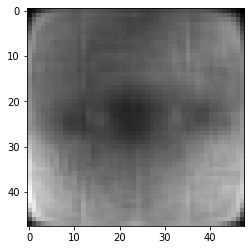

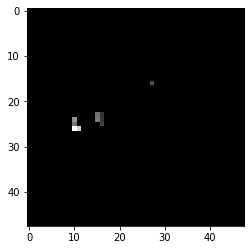


Epoch 4
62/62 [==============================] - 142s 2s/step - loss: 570.3051 - conv2d_transpose_38_loss: 570.3047 - conv2d_transpose_39_loss: 4.5443e-04


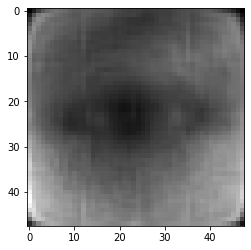

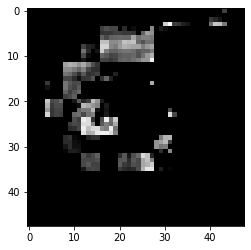


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 565.7735 - conv2d_transpose_38_loss: 565.7731 - conv2d_transpose_39_loss: 4.6786e-04


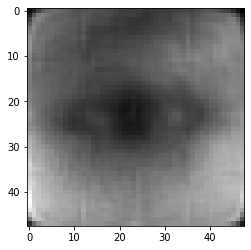

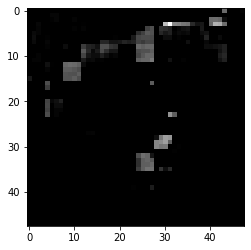

In [54]:
print('\nActivation - relu, optimizer - adam, loss - mse')
mse_reluAdamMse, pred1_reluAdamMse, pred2_reluAdamMse = compile_model('relu', 'adam', 'mse')


Activation - relu, optimizer - adam, loss - mae

Epoch 1
62/62 [==============================] - 143s 2s/step - loss: 43.1555 - conv2d_transpose_42_loss: 43.0977 - conv2d_transpose_43_loss: 0.0578


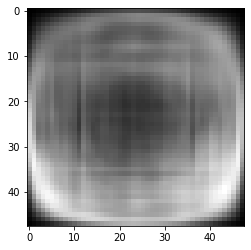

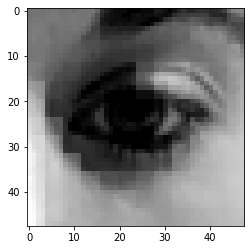


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 20.9398 - conv2d_transpose_42_loss: 20.9388 - conv2d_transpose_43_loss: 0.0010


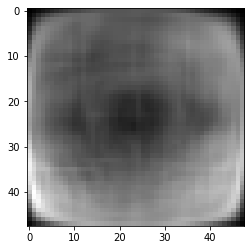

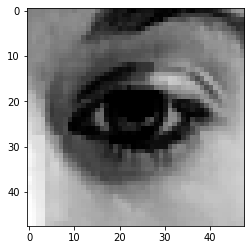


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 18.6249 - conv2d_transpose_42_loss: 18.6245 - conv2d_transpose_43_loss: 4.4865e-04


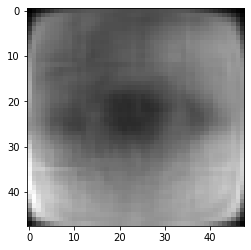

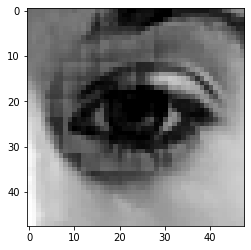


Epoch 4
62/62 [==============================] - 142s 2s/step - loss: 17.1312 - conv2d_transpose_42_loss: 17.1308 - conv2d_transpose_43_loss: 4.5843e-04


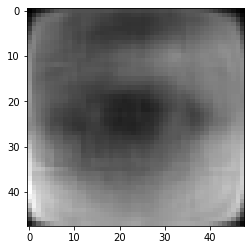

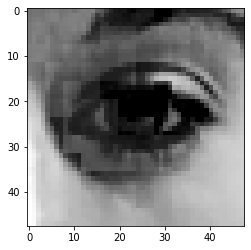


Epoch 5
62/62 [==============================] - 142s 2s/step - loss: 16.3592 - conv2d_transpose_42_loss: 16.3586 - conv2d_transpose_43_loss: 5.8884e-04


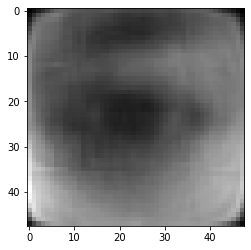

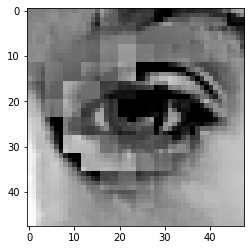

In [55]:
print('\nActivation - relu, optimizer - adam, loss - mae')
mse_reluAdamMae, pred1_reluAdamMae, pred2_reluAdamMae = compile_model('relu', 'adam', 'mae')


Activation - relu, optimizer - adamax, loss - mse

Epoch 1
62/62 [==============================] - 144s 2s/step - loss: 3704.6055 - conv2d_transpose_46_loss: 3704.4961 - conv2d_transpose_47_loss: 0.1081


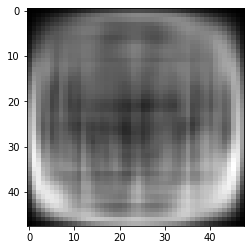

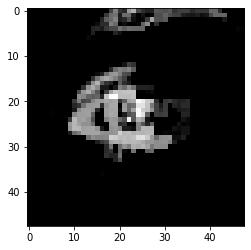


Epoch 2
62/62 [==============================] - 143s 2s/step - loss: 1176.9855 - conv2d_transpose_46_loss: 1176.9789 - conv2d_transpose_47_loss: 0.0065


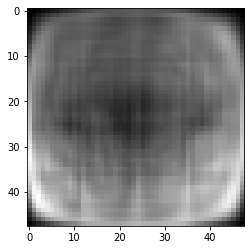

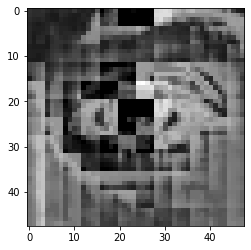


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 927.4147 - conv2d_transpose_46_loss: 927.4128 - conv2d_transpose_47_loss: 0.0018


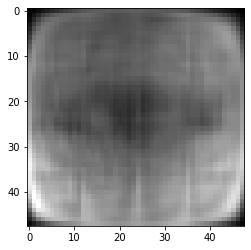

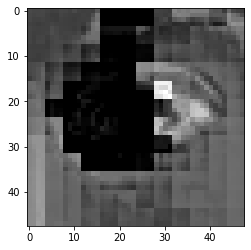


Epoch 4
62/62 [==============================] - 143s 2s/step - loss: 728.1037 - conv2d_transpose_46_loss: 728.1021 - conv2d_transpose_47_loss: 0.0015


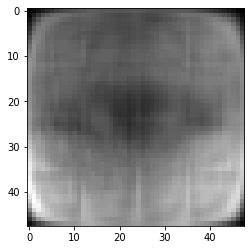

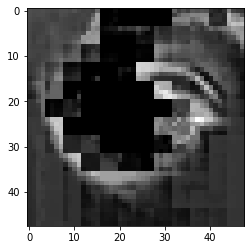


Epoch 5
62/62 [==============================] - 143s 2s/step - loss: 657.4766 - conv2d_transpose_46_loss: 657.4755 - conv2d_transpose_47_loss: 9.5358e-04


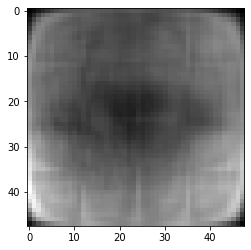

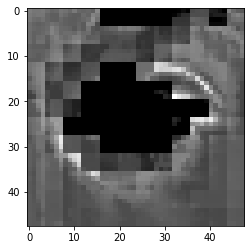

In [56]:
print('\nActivation - relu, optimizer - adamax, loss - mse')
mse_reluAdamaxMse, pred1_reluAdamaxMse, pred2_reluAdamaxMse = compile_model('relu', 'adamax', 'mse')


Activation - relu, optimizer - adamax, loss - mae

Epoch 1
62/62 [==============================] - 144s 2s/step - loss: 46.7352 - conv2d_transpose_50_loss: 46.6900 - conv2d_transpose_51_loss: 0.0452


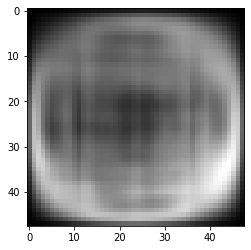

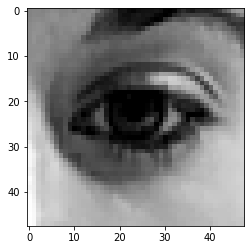


Epoch 2
62/62 [==============================] - 142s 2s/step - loss: 25.9398 - conv2d_transpose_50_loss: 25.9384 - conv2d_transpose_51_loss: 0.0014


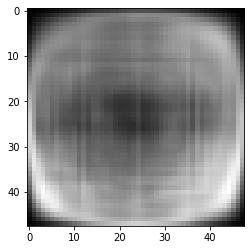

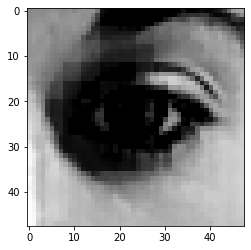


Epoch 3
62/62 [==============================] - 142s 2s/step - loss: 22.5166 - conv2d_transpose_50_loss: 22.5153 - conv2d_transpose_51_loss: 0.0012


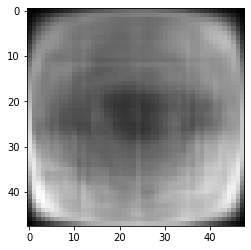

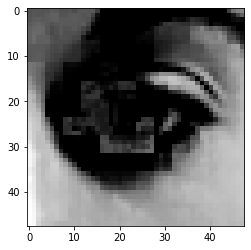


Epoch 4
62/62 [==============================] - 142s 2s/step - loss: 19.9584 - conv2d_transpose_50_loss: 19.9570 - conv2d_transpose_51_loss: 0.0014


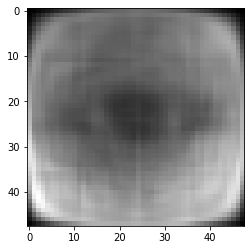

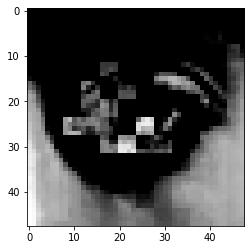


Epoch 5
62/62 [==============================] - 140s 2s/step - loss: 19.2402 - conv2d_transpose_50_loss: 19.2397 - conv2d_transpose_51_loss: 5.2624e-04


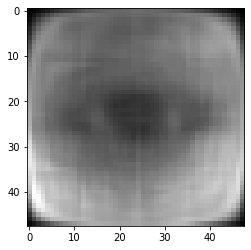

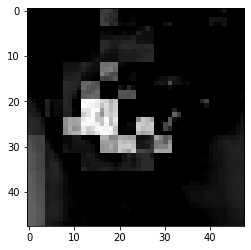

In [57]:
print('\nActivation - relu, optimizer - adamax, loss - mae')
mse_reluAdamaxMae, pred1_reluAdamaxMae, pred2_reluAdamaxMae = compile_model('relu', 'adamax', 'mae')


Activation - relu, optimizer - rmspop, loss - mse

Epoch 1
62/62 [==============================] - 143s 2s/step - loss: 8901.4307 - conv2d_transpose_62_loss: 8901.3691 - conv2d_transpose_63_loss: 0.0637


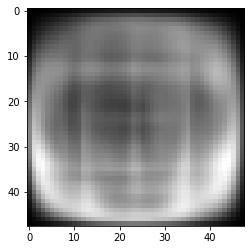

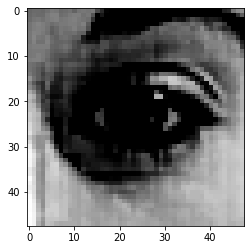


Epoch 2
62/62 [==============================] - 141s 2s/step - loss: 1829.5693 - conv2d_transpose_62_loss: 1829.5645 - conv2d_transpose_63_loss: 0.0051


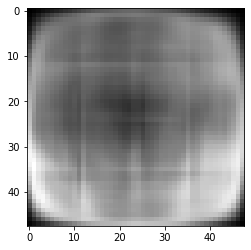

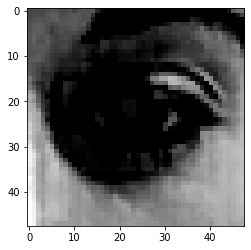


Epoch 3
62/62 [==============================] - 141s 2s/step - loss: 1133.5985 - conv2d_transpose_62_loss: 1133.5942 - conv2d_transpose_63_loss: 0.0043


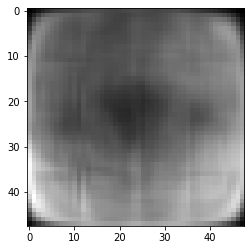

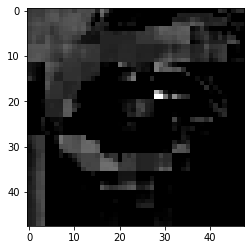


Epoch 4
62/62 [==============================] - 141s 2s/step - loss: 916.9781 - conv2d_transpose_62_loss: 916.9731 - conv2d_transpose_63_loss: 0.0052


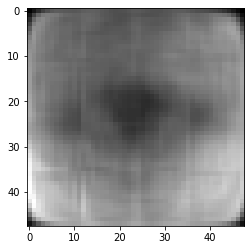

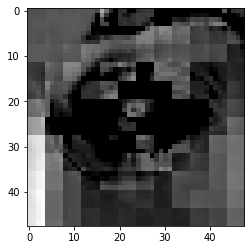


Epoch 5
62/62 [==============================] - 141s 2s/step - loss: 778.8633 - conv2d_transpose_62_loss: 778.8628 - conv2d_transpose_63_loss: 4.3459e-04


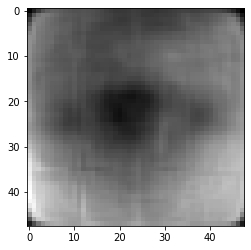

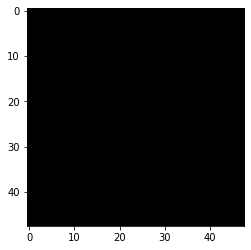

In [60]:
print('\nActivation - relu, optimizer - rmspop, loss - mse')
mse_reluRmspopMse, pred1_reluRmspopMse, pred2_reluRmspopMse = compile_model('relu', 'rmsprop', 'mse')

As we can see from the model outputs, the best combination is the default one. Optimizer - Adam, loss function - MSE and Relu as activation

## 4. Making prediction for 10 test images and printing them:

1 test image


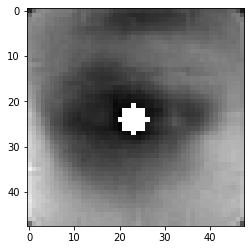

2 test image


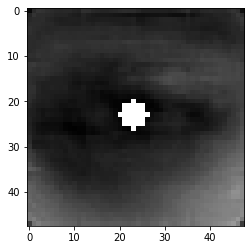

3 test image


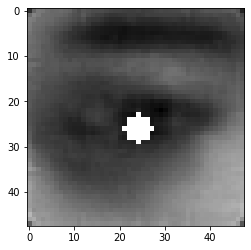

4 test image


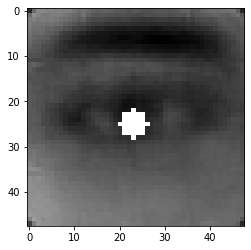

5 test image


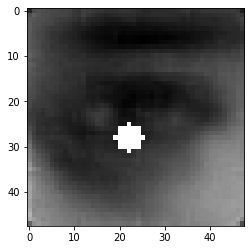

6 test image


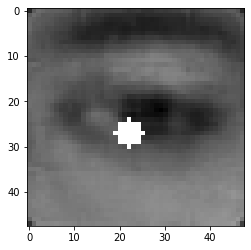

7 test image


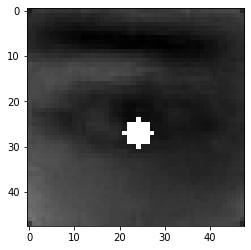

8 test image


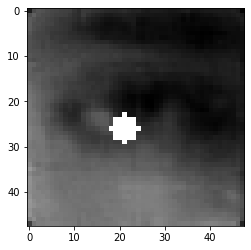

9 test image


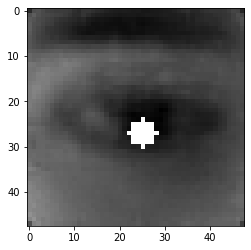

10 test image


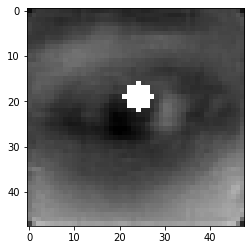

In [76]:
for k in range(10):
    print("{} test image".format(k + 1))
    eye = pred1_model[k]
    iris = pred2_model[k]
    for i in range(48):
      for j in range(48):
        if pred2_model[k][i][j] == 1:
          cv2.circle(eye, (int(i),int(j)), radius=3, color=(255, 255, 255), thickness=-1)
    plt.imshow(tensorflow.squeeze(eye), cmap='gray')
    plt.show()